In [1]:
import numpy as np
import pandas as pd

print('Setup Complete')

Setup Complete


In [2]:
TrainDf = pd.read_csv('train.csv')
TestDf = pd.read_csv('test.csv') 


In [3]:
TrainDf


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
TestDf.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [5]:
TrainDf.describe()#Visualize wiht count, mean, std, min, and max

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
TrainDf.info()#Look at the data types for each value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
#Before we drop the names and everything, lets check to see if there are no repeats of names or errors in the csv file
#There are 418 rows in the data and 418 unique names, there are no repeats within this data,we can drop the unneeded info
TestDf['Name'].nunique() 

418

In [8]:
#We dont need the following columns in our analysis, we dont need this info, cleans it and it looks much better
Train=TrainDf.drop(['Name','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)
Test =TestDf.drop(['Name','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis =1)

In [9]:
Train

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0
...,...,...,...,...,...
886,887,0,2,male,27.0
887,888,1,1,female,19.0
888,889,0,3,female,NaN
889,890,1,1,male,26.0


In [10]:
#For further reference the Passenger ID is passengers identification
#Survived 1= yes 0 = no 
#PClass separated by 1st class, 2nd class, and third class
#Each persons sex male or female
#Age of the passengers as a floating decimal

#We have several values designated as NaN lets do a basic clean(not the best method), we can presume they are infants
Train['Age'] = Train['Age'].fillna(4)
Test['Age'] = Test['Age'].fillna(4)

#Next lets convert male and female to integers so the values can be manipulated easier
for i in [Train,Test]:
    i['Sex Num'] = i['Sex'].map({'male':1,'female':0})
#Now Male = 1, Female = 0

In [11]:
Train = Train.drop(['Sex'],axis=1)
Test = Test.drop(['Sex'],axis=1)
Test

,PassengerId,Pclass,Age,Sex Num
0,892,3,34.5,1
1,893,3,47.0,0
2,894,2,62.0,1
3,895,3,27.0,1
4,896,3,22.0,0
...,...,...,...,...
413,1305,3,4.0,1
414,1306,1,39.0,0
415,1307,3,38.5,1
416,1308,3,4.0,1


<BarContainer object of 2 artists>

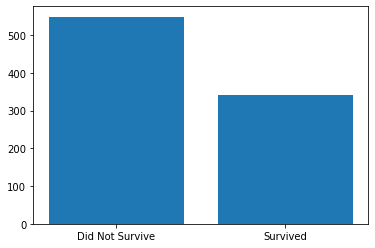

In [12]:
#Basic Analysis and Plotting
import matplotlib.pyplot as plt
import seaborn as sns
Num_Survived = Train[Train['Survived'] == 1]
Num_Not_Survive = Train[Train['Survived'] ==0]
Num_SurvivedN =Num_Survived.count()
Num_Not_SurvivedN = Num_Not_Survive.count()
data = [549,342]
Labels = ['Did Not Survive','Survived']
#plt.pie(data, labels = Labels)
plt.bar(Labels, data)
#549 of the passengers did not survive and 342 passengers survived we can also use a pie chart as visualization as well


In [13]:
#Lets do a quick analysis and see if there is a survival correlation with age
Survived1 = np.where((Train['Age']>= 5) & (Train['Survived'] == 1))
Not_Survived = np.where((Train['Age']>=5) & (Train['Survived'] ==0))
#Put people that arent infants that didnt survive and put them into a new data frame
ResSurvive= Train.iloc[Survived1] #263 instances
ResNot_Survived = Train.iloc[Not_Survived] #411 instances

([<matplotlib.patches.Wedge at 0x1d15e1a8>,
 [Text(-0.3719362810874234, 1.0352117671331105, 'Percent Not Survived'),
  Text(0.3719362810874237, -1.0352117671331102, 'Percent Survived')],
 [Text(-0.20287433513859454, 0.5646609638907875, '60.98%'),
  Text(0.20287433513859474, -0.5646609638907873, '39.02%')])

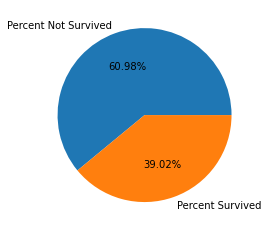

In [14]:
#Lets make a basic, easy pie chart to see the percentage who survived who arent infants
PercentNSurvive=len(ResNot_Survived)/(len(ResSurvive) + len(ResNot_Survived))
Remainder = 1 - PercentNSurvive
Data2 = [PercentNSurvive,Remainder]

Labels = ['Percent Not Survived', 'Percent Survived']
plt.pie(Data2, labels = Labels, autopct='%1.2f%%')


c:\users\wdelc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


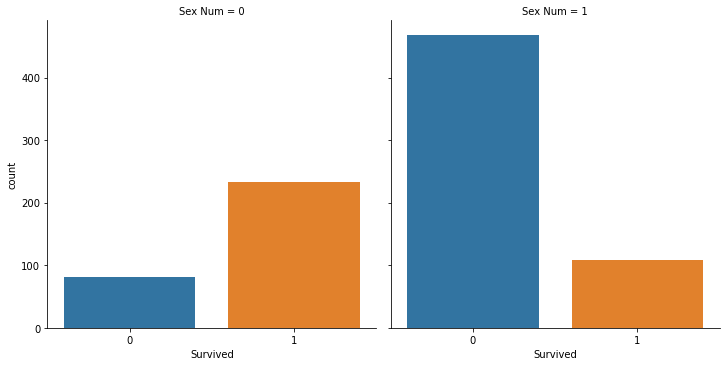

In [15]:
#What about gender? Any correlation between who survived as a man versus who survived as a women?
sns.factorplot(x='Survived', col = 'Sex Num', kind = 'count', data = Train) 

In [16]:
#Interpreting the above graph there is a surprising amount of males that died although lets double check to see
#how many women there are in comparison to men before we make any assumptions
FemaleCount=len(Train[Train['Sex Num'] == 0])
MaleCount = len(Train[Train['Sex Num'] == 1])
#MaleCount #577
#FemaleCount #314
#At first glance, it looks like the females were prioritized to save and get on life boats.
#So in the data set we have pool of 577 males and 314 females, what if the pool was the same, lets make a random algorithm
#that 



In [17]:
#This algorithim will randomly select data and make both pools of data to 200 in length 

Females = Train[Train['Sex Num'] == 0]
Males = Train[Train['Sex Num'] == 1]
MenSmallDf= Males.drop(Males['Sex Num'].eq(1).sample(frac = .65).index)
FemalesSmallDf = Females.drop(Females['Sex Num'].eq(0).sample(frac = .36).index)


c:\users\wdelc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\wdelc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


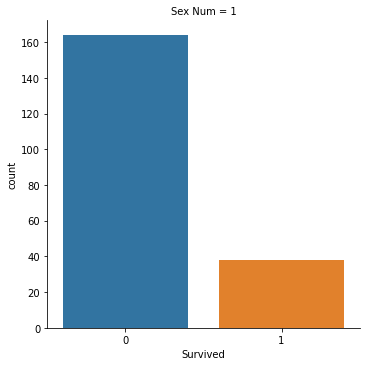

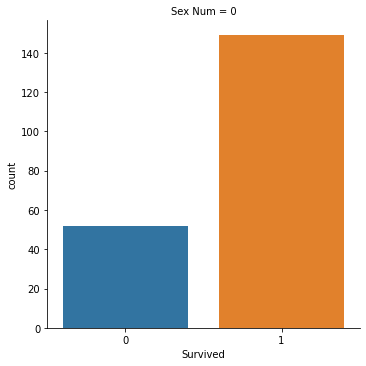

In [18]:
#Now with the smaller sets both 202 respectively, we will look at the pie chart once again.
sns.factorplot(x='Survived', col = 'Sex Num', kind = 'count', data = MenSmallDf)
sns.factorplot(x='Survived', col = 'Sex Num', kind = 'count', data = FemalesSmallDf)

#Even with a smaller randomized data set and the same sample size, there is still a clear correlation that the women were 
#prioritized on to the boats and most of the men did not survive as a result

<AxesSubplot:xlabel='Sex Num', ylabel='Age'>

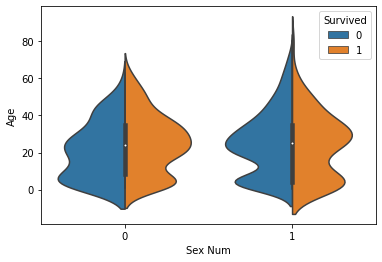

In [19]:
#Another plot based on who survived 0 is equal to female and 1 is equal to male
sns.violinplot(x= 'Sex Num', y = 'Age',hue = 'Survived', data= Train, split = True)
#We can see based off this plot that the input from when we filled up 176 entries with the number 4 for an age and these
#spikes can be seen in the graph
#Women around the age of 30-40 have peak deaths as well as men around 30-40


In [20]:
#Now lets examine the any correlations within the classes. Were first class prioritized or was it a free for all
#for an escape off the titanic? Lets search for survival rates amongst only the classes 
Survival_Rate_Class = Train.groupby(['Pclass'])['Survived'].mean()
Survival_Rate_Class
#There is a correlation, lets graph it

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

c:\users\wdelc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\wdelc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


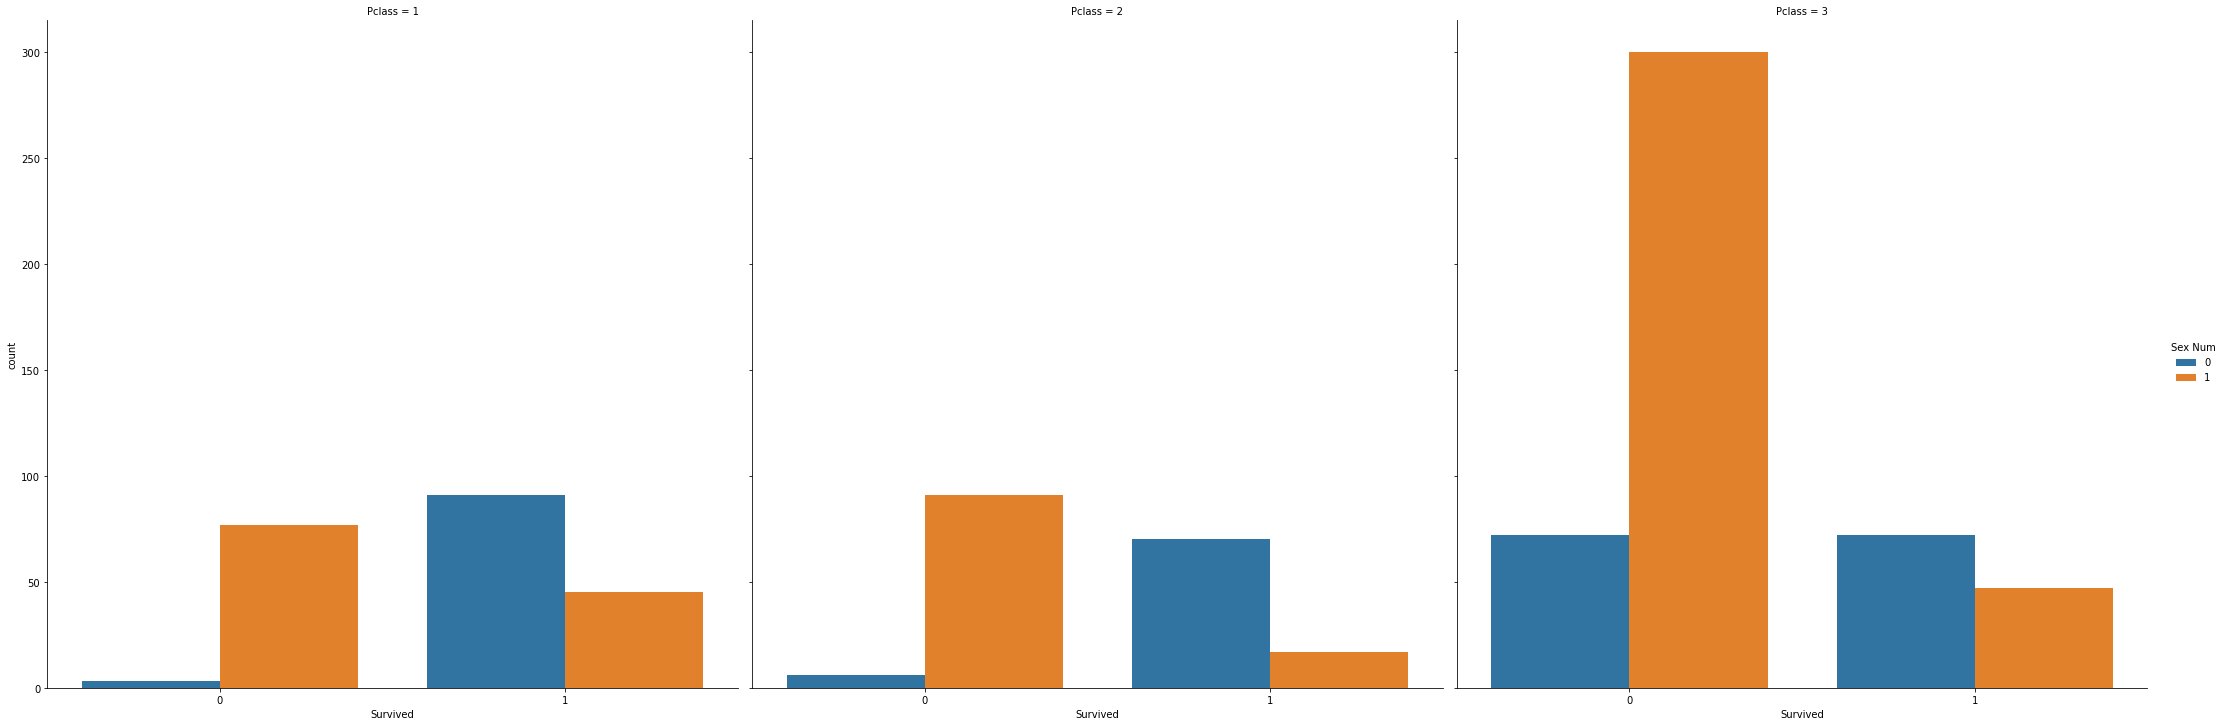

In [21]:
#For this section I referenced the following site, to help combine the two data sets: https://datascience.stackexchange.com/questions/46117/meaning-of-hue-in-seaborn-barplot
sns.factorplot(x= 'Survived', col='Pclass', hue='Sex Num', data=Train, kind='count', size=10)
#As we see from the data set, we can conclude that women had the highest survival rates espeically within the first class
#it can be seen that even in the second class that many survived

In [22]:
#Finally lets look at the ages and lets reassign their numeric values to a certain range. We can look at ranges
#and visualize the data better
ZerotoTen=np.where((Train['Age']>= 0) & (Train['Age']<= 10))
TentoTwenty=np.where((Train['Age']>10) & (Train['Age']<=20))
TwentytoThirty=np.where((Train['Age']>20) & (Train['Age']<=30))
ThirtytoFifty=np.where((Train['Age']>30) & (Train['Age']<=50))
FiftytoSixty=np.where((Train['Age']>50) & (Train['Age']<=60))
SixtytoSeventy = np.where((Train['Age'] > 60) & (Train['Age']<=70))
SeventyOrAbove = np.where(Train['Age'] > 70)


Infants=Train.iloc[ZerotoTen]
Infants['AgeNum'] = 1#Infants are assigned numbers 1
Teens=Train.iloc[TentoTwenty]
Teens['AgeNum'] = 2
StartAdults = Train.iloc[TwentytoThirty]
StartAdults['AgeNum'] = 3
MiddleAge = Train.iloc[ThirtytoFifty]
MiddleAge['AgeNum'] = 4
Fiftys = Train.iloc[FiftytoSixty]
Fiftys['AgeNum'] = 5
Sixtys = Train.iloc[SixtytoSeventy]
Sixtys['AgeNum'] = 6
Elderly = Train.iloc[SeventyOrAbove]
Elderly['AgeNum'] = 7

Newdf = pd.concat([Infants,Teens,StartAdults,MiddleAge,Fiftys,Sixtys,Elderly])

Newdf.sort_index(inplace = True)
#del Newdf[Newdf.columns[6]]
#del Train[Train.columns[6]]

Newdf

<ipython-input-22-18632e4257c9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Infants['AgeNum'] = 1#Infants are assigned numbers 1
<ipython-input-22-18632e4257c9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Teens['AgeNum'] = 2
<ipython-input-22-18632e4257c9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,PassengerId,Survived,Pclass,Age,Sex Num,AgeNum
0,1,0,3,22.0,1,3
1,2,1,1,38.0,0,4
2,3,1,3,26.0,0,3
3,4,1,1,35.0,0,4
4,5,0,3,35.0,1,4
...,...,...,...,...,...,...
886,887,0,2,27.0,1,3
887,888,1,1,19.0,0,2
888,889,0,3,4.0,0,1
889,890,1,1,26.0,1,3


c:\users\wdelc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\wdelc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


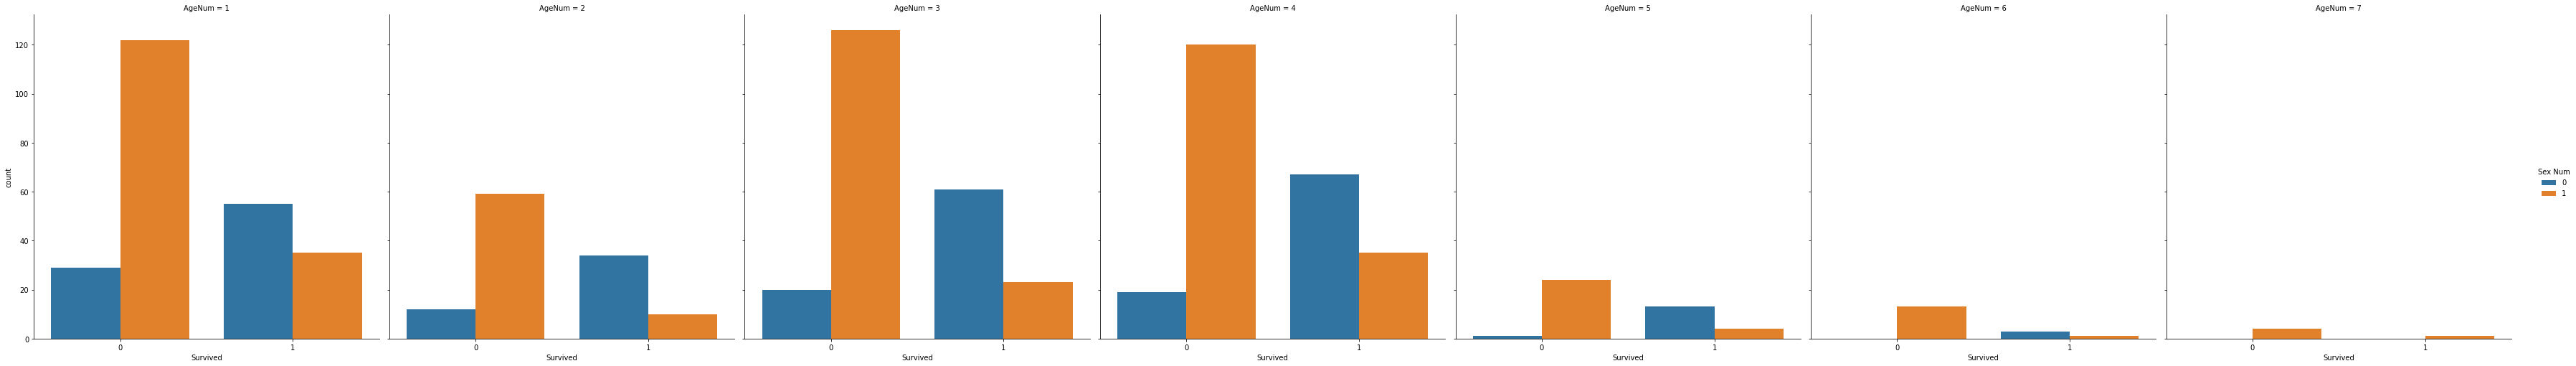

In [23]:
#Lets visualize

#Reminders of how to read this:
#Ages Key:
#1= 0-10
#2 = 10-20
#3 = 20-30
#4 = 30-50
#5 = 50-60
#6 = 60- 70
#7 = 70+

#Survived Key
#1= Survived 
#0 = Died

#Sex Key
#1 = Male
#0 = Female
sns.factorplot(x= 'Survived', col='AgeNum', hue='Sex Num', data=Newdf, kind='count', size=7)

#From the count plots, it seems the males between the ages of 20-50 have the least survival rate, in comparison to their
#counterparts, alot more females survived within this age group
#The most intersting is also AgeNum 1, nonetheless, this can be skewed because we filled approximately 170 null values
#and we all assigned them the age of 4, we might have to fix this or redo our cleaning later

c:\users\wdelc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\wdelc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


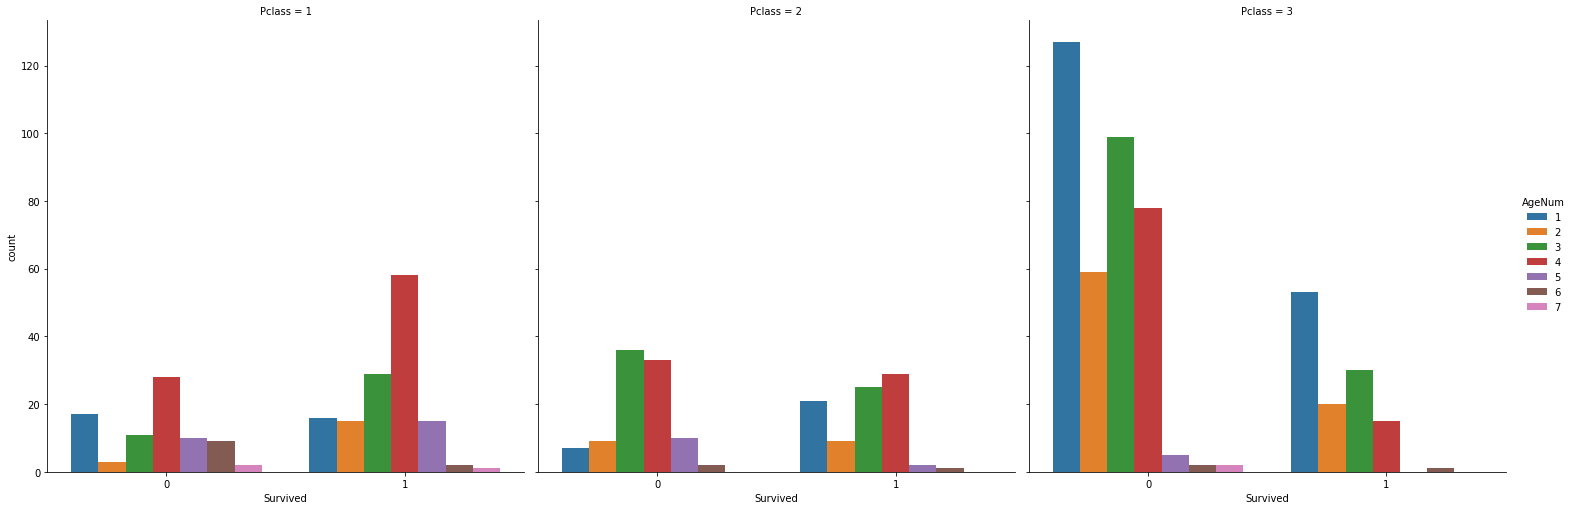

In [24]:
#Lets visualize it in another way, what about class & Age?
sns.factorplot(x= 'Survived', col='Pclass', hue='AgeNum', data=Newdf, kind='count', size=7)


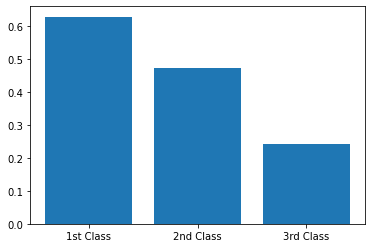

In [25]:
#Another visualization of survival rates w/class
Labels = ['1st Class', '2nd Class', '3rd Class']
plt.bar(Labels,Survival_Rate_Class)
plt.show()
#With these two graphs we can conclude that first class passengers were prioritized especially teenagers and middle aged
#females in the first class had the highest chances of surviving. Although I dont think we can conclude anything with
#infants because we were unsure of their age when we were cleaning the data. Lets see what it would look like if the null
#values are simply just dropped

In [26]:
TrainDf.head()#View original data frame
NewClean.dropna()

NameError: name 'NewClean' is not defined

In [27]:
#Do the same thing as above except with a new dataframe with all the dropped values
NewClean=TrainDf.drop(['Name','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)
NewClean.dropna()
for i in [NewClean]:
    i['Sex Num'] = i['Sex'].map({'male':1,'female':0})


ZerotoTen=np.where((Train['Age']>= 0) & (Train['Age']<= 10))
TentoTwenty=np.where((Train['Age']>10) & (Train['Age']<=20))
TwentytoThirty=np.where((Train['Age']>20) & (Train['Age']<=30))
ThirtytoFifty=np.where((Train['Age']>30) & (Train['Age']<=50))
FiftytoSixty=np.where((Train['Age']>50) & (Train['Age']<=60))
SixtytoSeventy = np.where((Train['Age'] > 60) & (Train['Age']<=70))
SeventyOrAbove = np.where(Train['Age'] > 70)


Infants=Train.iloc[ZerotoTen]
Infants['AgeNum'] = 1#Infants are assigned numbers 1
Teens=Train.iloc[TentoTwenty]
Teens['AgeNum'] = 2
StartAdults = Train.iloc[TwentytoThirty]
StartAdults['AgeNum'] = 3
MiddleAge = Train.iloc[ThirtytoFifty]
MiddleAge['AgeNum'] = 4
Fiftys = Train.iloc[FiftytoSixty]
Fiftys['AgeNum'] = 5
Sixtys = Train.iloc[SixtytoSeventy]
Sixtys['AgeNum'] = 6
Elderly = Train.iloc[SeventyOrAbove]
Elderly['AgeNum'] = 7

NewClean = pd.concat([Infants,Teens,StartAdults,MiddleAge,Fiftys,Sixtys,Elderly])

NewClean.sort_index(inplace = True)
NewClean

<ipython-input-27-1c3fcab5dccb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Infants['AgeNum'] = 1#Infants are assigned numbers 1
<ipython-input-27-1c3fcab5dccb>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Teens['AgeNum'] = 2
<ipython-input-27-1c3fcab5dccb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,PassengerId,Survived,Pclass,Age,Sex Num,AgeNum
0,1,0,3,22.0,1,3
1,2,1,1,38.0,0,4
2,3,1,3,26.0,0,3
3,4,1,1,35.0,0,4
4,5,0,3,35.0,1,4
...,...,...,...,...,...,...
886,887,0,2,27.0,1,3
887,888,1,1,19.0,0,2
888,889,0,3,4.0,0,1
889,890,1,1,26.0,1,3


In [33]:
NewClean.drop(NewClean[NewClean['Age'] == 4.0].index, inplace= True)
NewClean

,PassengerId,Survived,Pclass,Age,Sex Num,AgeNum
0,1,0,3,22.0,1,3
1,2,1,1,38.0,0,4
2,3,1,3,26.0,0,3
3,4,1,1,35.0,0,4
4,5,0,3,35.0,1,4
...,...,...,...,...,...,...
885,886,0,3,39.0,0,4
886,887,0,2,27.0,1,3
887,888,1,1,19.0,0,2
889,890,1,1,26.0,1,3


c:\users\wdelc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\wdelc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


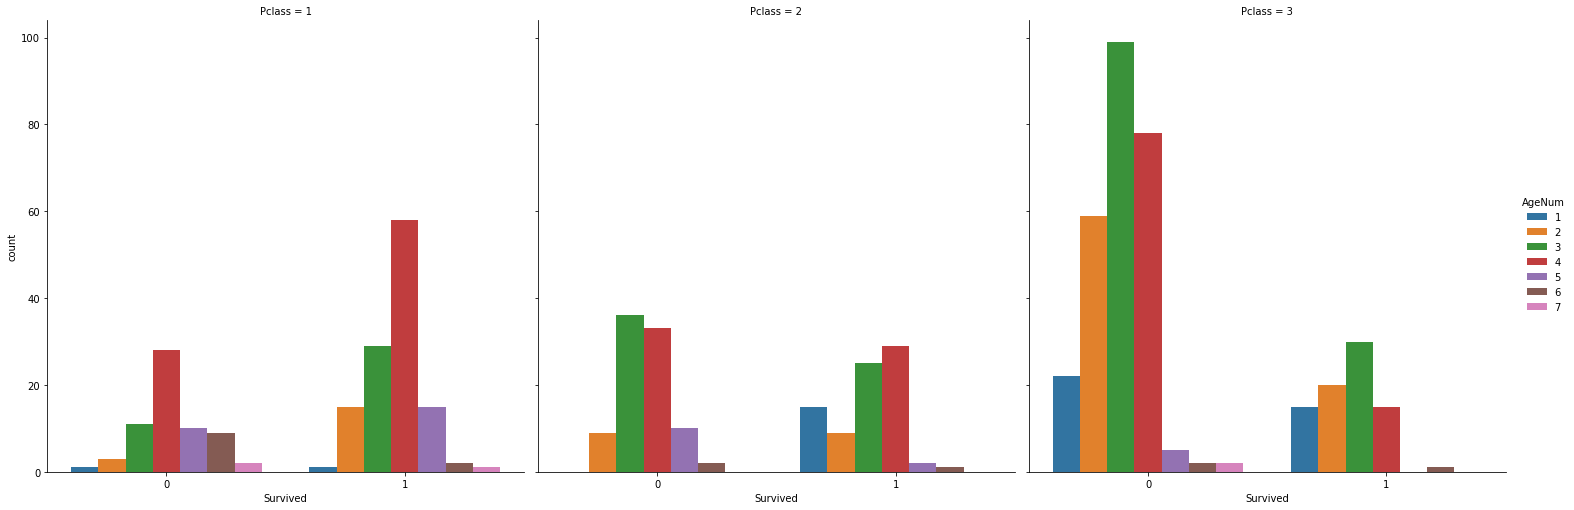

In [34]:
sns.factorplot(x= 'Survived', col='Pclass', hue='AgeNum', data= NewClean, kind='count', size=7)
#As we can see the null values we assigned are no longer skewing the data as much showing prominently that males with
#the age of 20-50 in the third class were more likely to die.